# Assignment A5

### Name: Rutuja Kawade         
### Class: TE-2       
### Roll No: 31229

### Problem Statement

Use the dataset in assignment 4 (Abalone dataset).

a) Load the data from data file

b) Explore the shape of dataset

c) Summarize the properties in the training dataset. Write findings from column description.

 

d) Check the dataset for any missing values, impute the missing values and also print out the correlation matrix.

e) Split data into train, test sets

f) Predict ring class as classification problem using Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### a) load the data from data file

In [2]:
df = pd.read_csv('Data/abalone.csv')

#### b) Explore the shape of dataset

In [3]:
df.shape

(4177, 9)

In [4]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


#### c) Summarize the dataset properties.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### In this dataset we have 9 columns out of which column 0 is of type object, column 1 to 7 are of type float and column 8 is of type int

#### d) Checking the dataset for missing values

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#### there are no missing values

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### printing the correlation matrix

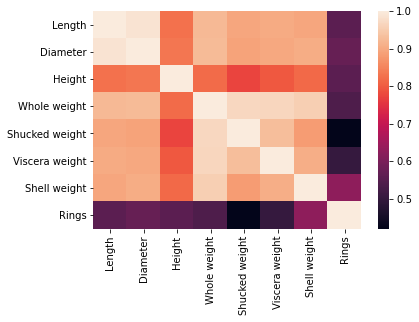

In [8]:
#plt.figure(figsize= (15,7))
corr = df.corr()
sns.heatmap(corr)
plt.show()

#### EDA and data preprocessing

In [9]:
cols = df.columns
print(cols)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


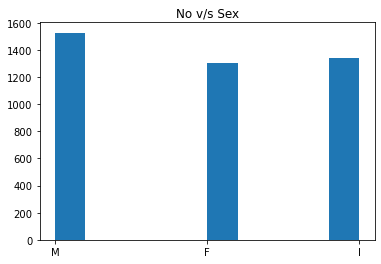

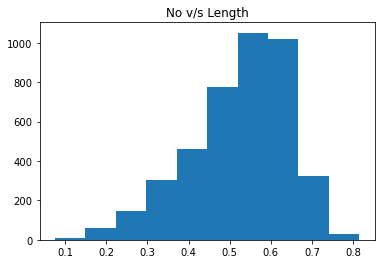

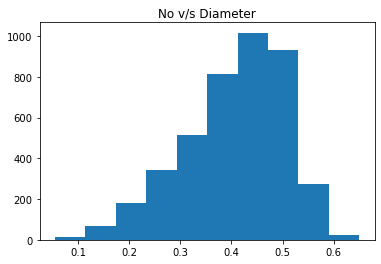

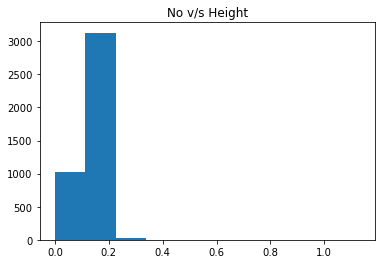

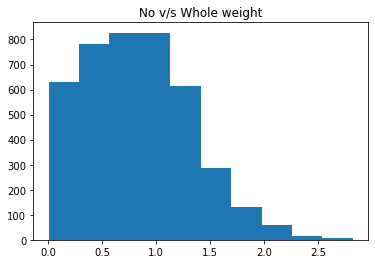

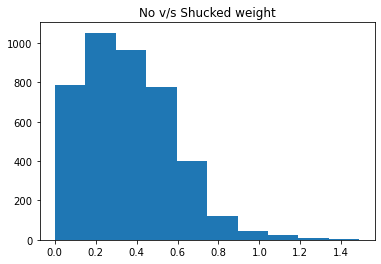

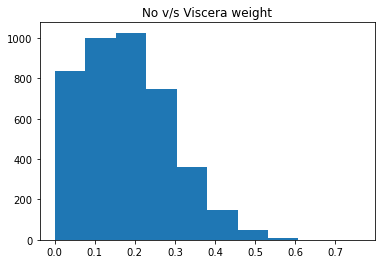

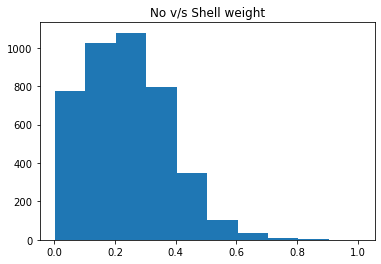

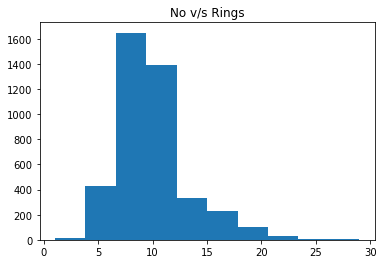

In [10]:
for i in cols:
    plt.hist(df[i])
    plt.title("No v/s "+i)
    plt.show()

In [11]:
df = pd.get_dummies(df,columns = ['Sex'])
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [12]:
x = df.drop(columns = ['Rings'])
y = df['Rings']

In [13]:
from scipy.stats import zscore
x = x.apply(zscore)

In [14]:
n_df = pd.DataFrame(x)
n_df = n_df.join(y)
n_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677,15
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677,7
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488,9
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677,10
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488,7


#### e) Split data into train, test sets

In [15]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.25)

#### f) Predict the ring class as classification problem using NaiveBayes

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
preds = model.predict(test_x)

In [24]:
print(pd.DataFrame(preds).head(10))

    0
0   8
1   5
2  23
3   7
4  23
5  22
6  23
7   9
8   8
9  22
